## Assumptions:

1\. The JSON file `models/CHILDREN_ACTIVITY.json` is structured with relevant fields like `activities`, `mandatory_activity`, `after_school`, etc.

2\. Children aged 5 or below are always dropped off by a parent.

3\. The method for calculating the mode of transport (either "linear" or "exponential") is determined by the user and defaults to "linear" if not specified.

4\. For children aged between 1 and 5, there's a 20% chance they'll attend "Fritidshem", and if they do, they will always be there until 4 PM (16:00).

5\. Time calculations assume that a day is within a 24-hour window and does not account for activities stretching over to the next day.




## Logic:

### Initialization:

- The JSON file containing activity data is loaded.

- Some utility functions are defined for time conversions, choosing transport, and other key tasks.

### Choosing Mode of Transport:

- For children aged 5 or below, the mode of transport is always "parent".

- For older children, a probability-based method (`linear` or `exponential`) is used to determine if they are dropped off by parents or use public transport.

### Identifying Age Group:

- The child's age is used to identify the relevant age group from the JSON data, which will determine the possible activities.

### Mandatory Activity Selection:

1\. The code fetches all possible "mandatory" activities for the age group.

2\. One activity is randomly selected based on its probability weight.

3\. A random start time for this activity is chosen within the allowed time range.

4\. The end time for the activity is then calculated based on its duration.

### Handling Fritidshem:

1\. If the child is between ages 1 to 5, there's a 20% chance they'll attend "Fritidshem".

2\. If they do attend, an entry is made at 6:30 AM (assuming they start early) and another one at the time when the mandatory activity begins.

3\. The end time is set to 4 PM (16:00) if the child attends "Fritidshem".

### After School Activities:

1\. From the possible "after-school" activities for the age group, one activity is randomly chosen.

2\. A random duration for this activity is picked within the allowed range (base duration ± variance).

3\. The activity's start time is the end time of the previous activity, and its end time is then calculated.

### Finalizing the Profile:

1\. All the activities selected (mandatory, possible "Fritidshem", and after-school) are assembled in sequence.

2\. A final entry is made for the child going home, with the mode of transport and the end time from the last activity.

At the end of the process, the data is converted into a Pandas DataFrame for presentation.

## Activity based of NHTS
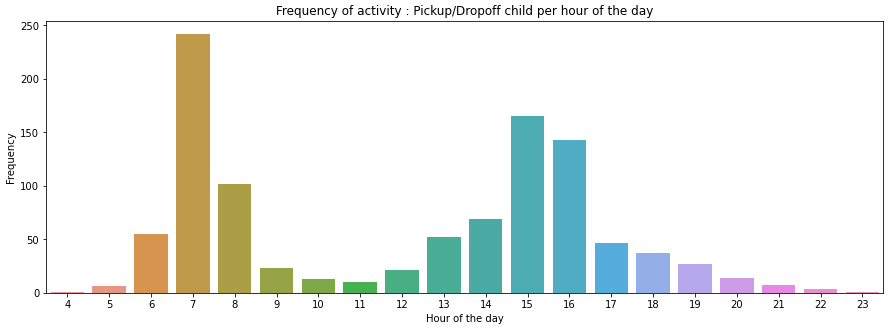

### Linear Model:

The linear model suggests a straight-line decrease in the probability of a parent dropping off their child as the child's age increases.

For this model, the probability is given by: Probability (Parent drop-off)=1-0.06×ageProbability (Parent drop-off)=1-0.06×age

Where the factor 0.060.06 determines the slope of the decrease. The idea is straightforward: for each year increase in age, the probability of a parent dropping off decreases by 6%.

For example:

-   At age 6, the probability is 1-0.06×6=0.641-0.06×6=0.64 or 64%.
-   At age 10, the probability is 1-0.06×10=0.41-0.06×10=0.4 or 40%.

### Exponential Model:

The exponential model suggests a more rapid decrease in the beginning which slows down as the age increases.

The probability in this model is given by: Probability (Parent drop-off)=exp⁡(-0.2×age)Probability (Parent drop-off)=exp(-0.2×age)

Where exp⁡()exp() is the exponential function. The factor 0.20.2 determines the rate of the decrease.

For example:

-   At age 6, the probability is roughly exp⁡(-0.2×6)≈0.55exp(-0.2×6)≈0.55 or 55%.
-   At age 10, the probability is roughly exp⁡(-0.2×10)≈0.37exp(-0.2×10)≈0.37 or 37%.

The exponential model suggests that younger children rapidly become more independent, but this rate of increased independence slows as they grow older.

### Comparison:

-   Linear Model: Uniform decline in parental drop-off probability as age increases.
-   Exponential Model: Rapid decline in the beginning, which slows down over time.

Both models capture different philosophical views on how children grow in independence over time. The choice between the models would depend on the observed data or beliefs about children's independence growth pattern

![Alt text](image-2.png)

In [5]:
import sys
sys.path.append("..") 
from tripsender import sequencer_c as sc
import json
import random

In [10]:
# Load children_activity.json with swedish characters as data
with open('../models/CHILDREN_ACTIVITY.json', encoding='utf-8') as f:
    data = json.load(f)

In [27]:
age = random.randint(1,17)
activity_sequences = sc.generate_child_activity_sequence(age,data,mode_method="linear")
activity_sequences

03:00 - HOME (408 mins)
09:48 - TRAVEL (12 mins)
10:00 - EDUCATION_förskola (180 mins)
12:51 - TRAVEL (9 mins)
13:00 - LEISURE_playground (73 mins)
14:13 - TRAVEL (16 mins)
14:29 - HOME (751 mins)